In [9]:
import numpy as np
import landlab
from landlab.plot.imshow import imshow_node_grid
from landlab.io import read_esri_ascii
%matplotlib inline

print "landlab version",landlab.__version__
(mg, z) = read_esri_ascii(r'D:\\crs\\proj\\2015_Sandwich\\SHOALS_lidar\\002_001.asc', name='elevation')
(mg2, z2) = read_esri_ascii(r'D:\\crs\\proj\\2015_Sandwich\\SHOALS_lidar\\001_001.asc', name='elevation')

landlab version 0.1.29


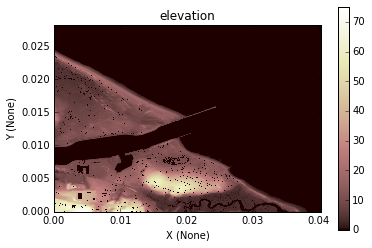

In [7]:
z[z<=-9999.0] = 0.
imshow_node_grid(mg, 'elevation')

In [15]:
zz = np.concatenate((z,z2))